### OHRC coverage plotting on WAC image

This script extracts Lat Long from csv files given in OHRC data and plots the coverage on WAC image

Date: 8/10/22


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
lo=[]
la=[]

In [ ]:
source_folder = 'E:/OHRC Data'

In [4]:
for folder in os.listdir(source_folder):
    og = source_folder+ '/' + folder
    #print('og',og)
    path = source_folder+ '/' + folder + '/' + 'geometry/calibrated'
    for content in os.listdir(path):
        path = path+'/'+content
        for file in os.listdir(path):
            if '.csv' in file:
                x = path+'/'+file
                df = pd.read_csv(x)
                for long, lat in zip(df[df.columns[0]],df[df.columns[1]]):
                    la.append(lat)
                    if long > 180:
                        lo.append(long-360)
                    else:
                        lo.append(long)

In [5]:
len(lo)

2594119

In [6]:
len(la)

2594119

In [ ]:
source_folder_north = 'E:/OHRC north pole'
lon =[]
lan =[]

In [8]:
for folder in os.listdir(source_folder_north):
    og = source_folder_north+ '/' + folder
    #print('og',og)
    path = source_folder_north+ '/' + folder + '/' + 'geometry/calibrated'
    for content in os.listdir(path):
        path = path+'/'+content
        for file in os.listdir(path):
            if '.csv' in file:
                x = path+'/'+file
                df = pd.read_csv(x)
                for long, lat in zip(df[df.columns[0]],df[df.columns[1]]):
                    lan.append(lat)
                    if long > 180:
                        lon.append(long-360)
                    else:
                        lon.append(long)

In [9]:
len(lon)

367356

In [10]:
len(lan)

367356

In [ ]:
source_folder_south = 'E:/OHRC south pole'
los =[]
las =[]

In [12]:
for folder in os.listdir(source_folder_south):
    og = source_folder_south+ '/' + folder
    #print('og',og)
    path = source_folder_south+ '/' + folder + '/' + 'geometry/calibrated'
    for content in os.listdir(path):
        path = path+'/'+content
        for file in os.listdir(path):
            if '.csv' in file:
                x = path+'/'+file
                df = pd.read_csv(x)
                for long, lat in zip(df[df.columns[0]],df[df.columns[1]]):
                    las.append(lat)
                    if long > 180:
                        los.append(long-360)
                    else:
                        los.append(long)

In [13]:
len(los)

1957417

In [14]:
len(las)

1957417

(1440, 2880)


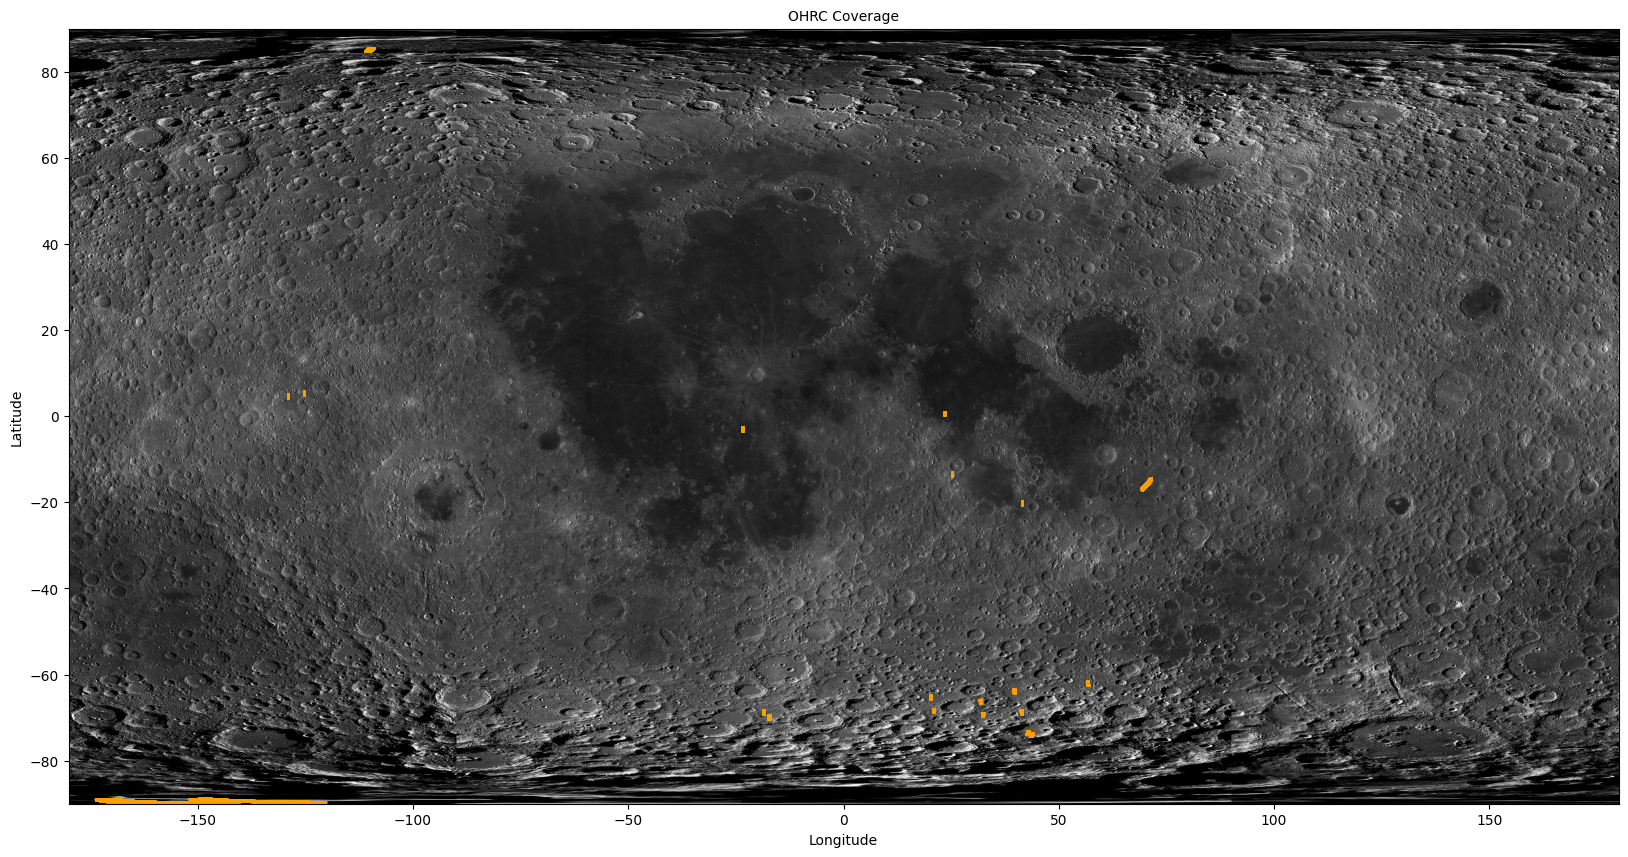

In [16]:
im = Image.open('WAC_GLOBAL_E000N0000_008P.tiff')
global_moon = np.array(im)
print(global_moon.shape)
plt.figure(figsize=(20,40))
plt.imshow(global_moon,extent=[-180,180,-90,90],cmap='gray')
plt.scatter(lo,la,s=0.9,alpha=0.2,color='orange')
plt.scatter(lon,lan,s=0.9,alpha=0.2,color='orange')
plt.scatter(los,las,s=0.9,alpha=0.2,color='orange')
plt.xlabel('Longitude',fontsize=10)
plt.ylabel('Latitude',fontsize=10)
plt.title('OHRC Coverage',fontsize=10)
plt.savefig('OHRC_coverage_global_moon.png',dpi=300,bbox_inches='tight')